In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
import os

In [4]:
def ReadCSV(csvfile):
    csv = pd.read_csv(csvfile, header=None)
    return csv.values

In [5]:
csv_corona = ReadCSV(r"D:\Codes\keyan\data\corona_discharge\t2.csv")
label = "corona"

In [6]:
np_co = np.array(csv_corona)

In [7]:
def plot3(data, title):
    sns.set_style('dark')
    f, ax = plt.subplots()
    ax.set(ylabel='frequency')
    ax.set(xlabel='a(blue) / b(green) / c(red)')
    ax.set(title=title)
    sns.distplot(data[:, 0:1], color='blue')
    sns.distplot(data[:, 1:2], color='green')
    sns.distplot(data[:, 2:3], color='red')
    plt.show()

In [20]:
def MyDataTransform(nparray):
    # 模仿：
    # 1. sklearn.preprocessing中的StandardScaler().fit_transform
    # 2. tutorial中计算训练集均值与方差函数
    # 2.1 将数据拼接，然后计算最大值、最小值、均值、方差
    # 第一步：实现Normalization，将数据缩放到0和1之间，保留原始数据的分布，即减最小值除以（最大值减最小值）
    # 第二步：实现Standardization，将数据缩放到均值为0方差为1，即减均值除以标准差
    # 第一个问题：上述实现方法与sklearn是否相同？
    # 第二个问题：暂定
    """
    输入np.array，对数据进行标准化与归一化，返回np.array
    """

In [27]:
def LinkData(filepath):
    """
    从filepath中读取csv文件，拼接，返回dataframe.values
    """
    csvs = []
    fh = open(filepath, 'r')
    for line in fh:
        line = line.rstrip()
        paths = line.split()
        csvs.append(paths[0])
    
    for csv in csvs:
        data = pd.read_csv(csv, header=None)
        if(csv == csvs[0]):
            ret = data
        else:
            ret = pd.concat([ret, data], ignore_index=True)
    
    return ret.values        

In [28]:
path = r"D:\Codes\keyan\peidian\train_list.txt"

In [29]:
x = LinkData(path)

In [30]:
x.shape

(160000, 3)

In [36]:
def MaxMinMeanStd(x):
    """
    返回最大值、最小值、均值、方差(n-1)
    """
    ret = []
    _max = np.max(x, axis=0)
    _min = np.min(x, axis=0)
    _mean = np.mean(x, axis=0)
    _std = np.std(x, axis=0, ddof=1)
    ret = np.array([_max, _min, _mean, _std])
    return ret

In [96]:
q = np.array([[4, 5, 6], [1, 2, 3]])

In [97]:
test = MaxMinMeanStd(q)

In [98]:
test

array([[4.        , 5.        , 6.        ],
       [1.        , 2.        , 3.        ],
       [2.5       , 3.5       , 4.5       ],
       [2.12132034, 2.12132034, 2.12132034]])

In [87]:
def DataNormal(x, mx):
    """
    暂定为x*3型数据
    x为np数组，mx为x的最值
    对x进行缩放(min max normalization)
    """
    ret = np.zeros_like(x)
    for i in range(3):
        _max = mx[0][i]
        _min = mx[1][i]
        mid = _max - _min
        for j in range(len(x)):
            ret[j][i] = (x[j][i] - _min) / mid
    
    return ret

In [ ]:
# 1. Rescaling (min-max normalization)
# 2. Standardization(Z-score normalization)

In [3]:
import tools
import numpy as np

In [4]:
x = tools.MaxMinMeanStd(np.array([[4,5,6],[1,2,3]]))

In [6]:
def ZScoreNormalize(x, mx):
    """
    标准化，Standardization(Z-score normalization)
    x = (x_i - mean(x)) / sigma
    (sigma指标准差)
    """
    ret = np.zeros_like(x)
    for i in range(3):
        _mean = mx[0][i]
        _std = mx[1][i]
        for j in range(len(x)):
            ret[j][i] = (x[j][i] - _mean) / _std
    return ret

In [8]:
q = np.array([[4,5,6],[1,2,3]])

In [11]:
from sklearn import preprocessing

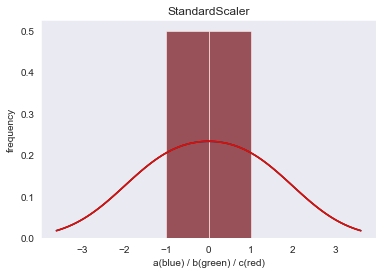

In [14]:
standard_scaler_data = preprocessing.StandardScaler().fit_transform(q)
tools.plot3(standard_scaler_data, 'StandardScaler')

In [15]:
standard_scaler_data

array([[ 1.,  1.,  1.],
       [-1., -1., -1.]])

In [25]:
q

array([[4, 5, 6],
       [1, 2, 3]])

In [26]:
ss = preprocessing.StandardScaler()
ss.fit(q)

StandardScaler()

In [30]:
ss.scale_ = np.std(q, axis=0, ddof=1)

In [31]:
qs = ss.transform(q)

In [32]:
q

array([[4, 5, 6],
       [1, 2, 3]])

In [33]:
qs

array([[ 0.70710678,  0.70710678,  0.70710678],
       [-0.70710678, -0.70710678, -0.70710678]])

In [34]:
q

array([[4, 5, 6],
       [1, 2, 3]])

In [56]:
q = np.array([[4,5,6],[1,2,3]])
q = q.astype(float)
print(q)
q[:, 0] = q[:, 0] * 3 / 4
print(q)

[[4. 5. 6.]
 [1. 2. 3.]]
[[3.   5.   6.  ]
 [0.75 2.   3.  ]]


In [54]:
q = q.astype(float)

[[2.25 5.   6.  ]
 [0.   2.   3.  ]]


In [94]:
def ZScoreNormalizeMatrix(x, mx):
    """
    标准化，Standardization(Z-score normalization)
    x = (x_i - mean(x)) / sigma
    (sigma指标准差)
    """
    ret = np.zeros_like(x)
    for i in range(3):
        _mean = mx[0][i]
        _std = mx[1][i]
        ret[:, i] = (x[:, i] - _mean) / _std
    return ret

In [95]:
q = np.array([[4,5,6],[1,2,3]]).astype(float)

In [96]:
ss = preprocessing.StandardScaler()
ss.fit(q)
ss.scale_ = np.std(q, axis=0, ddof=1)

In [97]:
qs = ss.transform(q)
print(qs)

[[ 0.70710678  0.70710678  0.70710678]
 [-0.70710678 -0.70710678 -0.70710678]]


In [98]:
qt = tools.MaxMinMeanStd(q)

In [99]:
qtm = ZScoreNormalizeMatrix(q, qt[2:4])

In [100]:
qtm

array([[ 0.70710678,  0.70710678,  0.70710678],
       [-0.70710678, -0.70710678, -0.70710678]])

In [86]:
print(q)
print(qt[2:4])

[[4. 5. 6.]
 [1. 2. 3.]]
[[2.5        3.5        4.5       ]
 [2.12132034 2.12132034 2.12132034]]


In [81]:
(q[:, 0] - 2.5) / 2.12132034

array([ 0.70710678, -0.70710678])

In [87]:
for i in range(3):
    _mean = qt[2:4][0][i]
    _std = qt[2:4][1][i]
    print((q[:, i] - _mean) / _std)

[ 0.70710678 -0.70710678]
[ 0.70710678 -0.70710678]
[ 0.70710678 -0.70710678]


In [85]:
q

array([[4., 5., 6.],
       [1., 2., 3.]])

In [105]:
tools.MaxMinNormalize(q, qt[:2])

array([[1., 1., 1.],
       [0., 0., 0.]])

In [106]:
def MaxMinNormalizeMatrix(x, mx):
    """
    暂定为x*3型数据
    x为np数组，mx为x的最值
    对x进行缩放(min max normalization)
    """
    ret = np.zeros_like(x)
    for i in range(3):
        _max = mx[0][i]
        _min = mx[1][i]
        mid = _max - _min
        ret[:, i] = (x[:, i] - _min) / mid
    return ret

In [107]:
MaxMinNormalizeMatrix(q, qt[:2])

array([[1., 1., 1.],
       [0., 0., 0.]])